In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import wordcloud as wc

In [3]:
version1_path = "../data/raw/td_V1.db"
version2_path = "../data/raw/td_V2.db"
con1 = sqlite3.connect(version1_path)
con2 = sqlite3.connect(version2_path)

In [4]:
light_q = """SELECT key
     FROM jira_issues"""

heavy_q = """SELECT *
     FROM jira_issues"""

commits_q = """SELECT *
    FROM git_commits"""

In [5]:
light1 = pd.read_sql(light_q, con1)
light2 = pd.read_sql(light_q, con2)

In [6]:
heavy1 = pd.read_sql(heavy_q, con1)
heavy2 = pd.read_sql(heavy_q, con2)

In [7]:
heavy1.columns

Index(['projectID', 'key', 'creationDate', 'resolutionDate', 'updateDate',
       'dueDate', 'resolution', 'type', 'priority', 'fixVersions', 'versions',
       'timeSpent', 'aggregatedTimeSpent', 'timeEstimate',
       'timeOriginalEstimate', 'aggregateTimeEstimate', 'progressPercent',
       'componentName', 'componentDescription', 'description', 'summary',
       'watchCount', 'votes', 'labels', 'creatorName', 'creatorActive',
       'assignee', 'reporter'],
      dtype='object')

In [8]:
heavy2.columns

Index(['PROJECT_ID', 'KEY', 'CREATION_DATE', 'RESOLUTION_DATE', 'HASH',
       'COMMIT_DATE'],
      dtype='object')

In [9]:
light1.shape, light2.shape

((67427, 1), (22007, 1))

In [10]:
heavy1.shape, heavy2.shape

((67427, 28), (22007, 6))

In [11]:
len(set(light1["key"]).intersection(set(light2["KEY"])))

9300

In [12]:
commits1 = pd.read_sql(commits_q, con1)
commits2 = pd.read_sql(commits_q, con2)

In [13]:
commits1.shape, commits2.shape

((140687, 13), (81072, 13))

In [14]:
len(set(commits1["commitHash"]).intersection(set(commits2["COMMIT_HASH"])))

75009

In [15]:
heavy1.columns

Index(['projectID', 'key', 'creationDate', 'resolutionDate', 'updateDate',
       'dueDate', 'resolution', 'type', 'priority', 'fixVersions', 'versions',
       'timeSpent', 'aggregatedTimeSpent', 'timeEstimate',
       'timeOriginalEstimate', 'aggregateTimeEstimate', 'progressPercent',
       'componentName', 'componentDescription', 'description', 'summary',
       'watchCount', 'votes', 'labels', 'creatorName', 'creatorActive',
       'assignee', 'reporter'],
      dtype='object')

In [16]:
len(set(heavy1["key"])), len(heavy1)

(67427, 67427)

In [17]:
full_text = heavy1["description"].to_string()

In [18]:
full_text2 = ""
for i, row in heavy1.iterrows():
    full_text2 += row["description"] + " "
    

In [19]:
my_word_cloud = wc.WordCloud(background_color="white").generate(full_text)

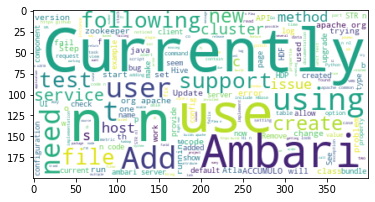

In [20]:
plt.imshow(my_word_cloud, interpolation='bilinear')

- contar nans del text
- contar nans de data ini, data fi, data due
- histograma de les longituds dels textos

In [21]:
# number of null descriptions
print("NA values:", sum(heavy1["description"].isna()))
proportion = sum(heavy1["description"]=="") / len(heavy1)
print("Empty values:", sum(heavy1["description"]==""), f" Proportion:{proportion:.03}")
print("All the values:", len(heavy1))

NA values: 0
Empty values: 5985  Proportion:0.0888
All the values: 67427


In [22]:
# number of null descriptions
print("NA values:", sum(heavy1["summary"].isna()))
proportion = sum(heavy1["summary"]=="") / len(heavy1)
print("Empty values:", sum(heavy1["summary"]==""), f" Proportion:{proportion:.03}")
print("All the values:", len(heavy1))

NA values: 0
Empty values: 0  Proportion:0.0
All the values: 67427


In [23]:
# number of null dates
variable = "creationDate"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

creationDate
NA values: 0
Empty values:  0 Proportion: 0.0


In [24]:
# number of null dates
variable = "updateDate"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

updateDate
NA values: 0
Empty values:  0 Proportion: 0.0


In [25]:
# number of null dates
variable = "resolutionDate"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

resolutionDate
NA values: 0
Empty values:  10705 Proportion: 0.159


In [26]:
# number of null dates
variable = "dueDate"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

dueDate
NA values: 0
Empty values:  66546 Proportion: 0.987


In [27]:
# number of null dates
variable = "timeOriginalEstimate"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

timeOriginalEstimate
NA values: 0
Empty values:  66050 Proportion: 0.98


In [28]:
# number of null dates
variable = "aggregatedTimeSpent"
print(variable)
print("NA values:", sum(heavy1[variable].isna()))
proportion = sum(heavy1[variable]=="") / len(heavy1)
print("Empty values: ", sum(heavy1[variable]==""), f"Proportion: {proportion:.03}")

aggregatedTimeSpent
NA values: 0
Empty values:  61313 Proportion: 0.909


In [29]:
import matplotlib.pyplot as plt

In [30]:
desc_lens = heavy1["description"].apply(lambda x: len(x.split(" ")))
desc_no_outlier_lens = desc_lens[desc_lens< 20_000]

sum_lens = heavy1["summary"].apply(lambda x: len(x.split(" ")))
sum_no_outlier_lens = sum_lens[sum_lens< 40_000]

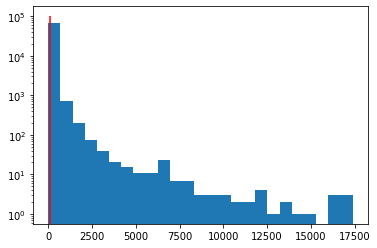

In [31]:
_ = plt.hist(desc_no_outlier_lens, log=True, bins = 25)
plt.vlines(np.mean(desc_no_outlier_lens), ymin=0, ymax = 10**5, colors="red")

In [32]:
np.mean(desc_no_outlier_lens)

105.37791456541086

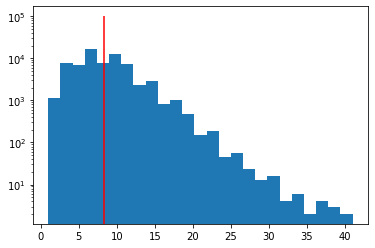

In [33]:
_ = plt.hist(sum_no_outlier_lens, log=True, bins = 25)
plt.vlines(np.mean(sum_no_outlier_lens), ymin=0, ymax = 10**5, colors="red")

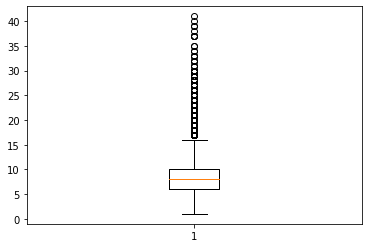

In [34]:
_ = plt.boxplot(sum_no_outlier_lens)

In [35]:
import datetime as dt

def parse_date(x):
    if x == "":
        return dt.datetime(2000, 1,1)
    return dt.datetime.strptime(x.split("T")[0], "%Y-%m-%d")

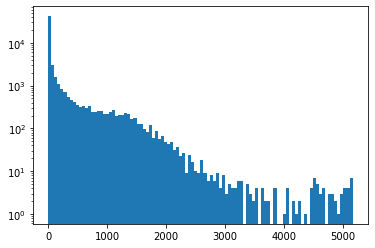

In [36]:
durations = heavy1["resolutionDate"].apply(parse_date) - heavy1["creationDate"].apply(parse_date)
durations = [d.days for d in durations if d.days >= 0]
_ = plt.hist(durations, bins=100, log=True)

# Word clouds

### Summaries

In [44]:
text_data = heavy1[["summary", "resolutionDate", "creationDate"]].copy()
text_data = text_data[text_data['resolutionDate'] != ""].copy()
text_data['dur'] = heavy1["resolutionDate"].apply(parse_date) - heavy1["creationDate"].apply(parse_date)
text_data['dur'] = [d.days for d in text_data['dur']]
perc25 = np.percentile(list(text_data['dur']), 25)
perc75 = np.percentile(list(text_data['dur']), 75)
txt1 = " ".join(list(text_data[text_data['dur'] >= perc75].copy()['summary']))
txt2 = " ".join(list(text_data[text_data['dur'] <= perc25].copy()['summary']))

(-0.5, 399.5, 199.5, -0.5)

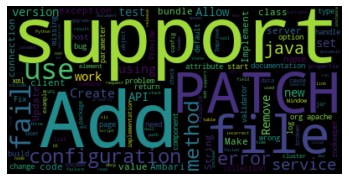

In [38]:
wc1 = wc.WordCloud().generate(txt1)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

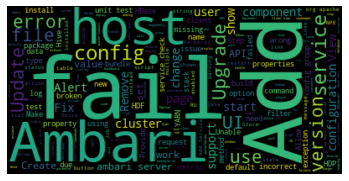

In [39]:
wc1 = wc.WordCloud().generate(txt2)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")

In [40]:

perc25

0.0

### Descriptions

(-0.5, 399.5, 199.5, -0.5)

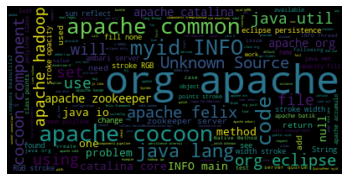

In [41]:
text_data = heavy1[["description", "resolutionDate", "creationDate"]].copy()
text_data = text_data[text_data['resolutionDate'] != ""].copy()
text_data['dur'] = heavy1["resolutionDate"].apply(parse_date) - heavy1["creationDate"].apply(parse_date)
text_data['dur'] = [d.days for d in text_data['dur']]
perc25 = np.percentile(list(text_data['dur']), 25)
perc75 = np.percentile(list(text_data['dur']), 75)
txt1 = " ".join(list(text_data[text_data['dur'] >= perc75].copy()['description']))
txt2 = " ".join(list(text_data[text_data['dur'] <= perc25].copy()['description']))
wc1 = wc.WordCloud().generate(txt1)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

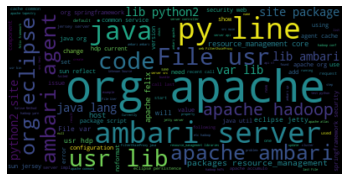

In [42]:
wc1 = wc.WordCloud().generate(txt2)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")

# TF-idf + PCA

In [45]:
import re
text_data['summary_preproc'] = text_data['summary'].map(lambda x: re.sub('[,\.!?]', '', x))
text_data['summary_preproc'] = text_data['summary'].map(lambda x: x.lower())
text_data['summary'].head()

8     Sync org.apache.commons.exec.OS with the newes...
10       Maven site creation fails with Findbugs errors
11    File plugin on browser platform causes "proxy ...
15            Handling of escaped values by StringUtils
16                         StreamPumper - Check For EOF
Name: summary, dtype: object

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(use_idf=True)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(list(text_data['summary']))
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[1]
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head(45)

,tfidf
findbugs,0.492386
creation,0.426646
errors,0.405085
site,0.384455
maven,0.369782
fails,0.271998
with,0.230018
propertiesutil,0.000000
property_value_attributes,0.000000
property_modes,0.000000


In [47]:
tfidf_vectorizer_vectors[1].T.todense()

matrix([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [58]:
from sklearn.decomposition import PCA, TruncatedSVD

pca = TruncatedSVD(n_components=2, n_iter=10)
pca.fit(tfidf_vectorizer_vectors)


TruncatedSVD(n_iter=10)

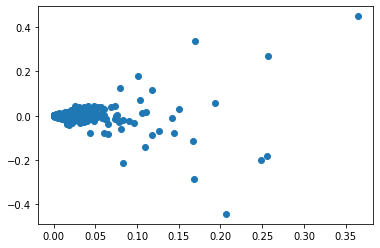

In [59]:
pca.components_.T
plt.scatter(pca.components_[0,:], pca.components_[1,:])